# import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("D:/PBA/breast-cancer.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df_cluster = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
df_cluster.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
157,16.840,19.46,108.40,880.2,0.07445,0.07223,0.05150,0.02771,0.1844,0.05268,...,18.220,28.07,120.30,1032.0,0.08774,0.1710,0.1882,0.08436,0.2527,0.05972
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.02307,0.1846,0.05325,...,19.180,26.56,127.30,1084.0,0.10090,0.2920,0.2477,0.08737,0.4677,0.07623
427,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,...,12.760,32.04,83.69,489.5,0.13030,0.1696,0.1927,0.07485,0.2965,0.07662
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.2436,0.1434,0.04786,0.2254,0.10840
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.350,27.57,125.40,832.7,0.14190,0.7090,0.9019,0.24750,0.2866,0.11550


In [7]:
from sklearn.cluster import KMeans

In [8]:
clusters = KMeans(n_clusters=3, random_state = 101)

In [9]:
clusters.fit(df_cluster) 

KMeans(n_clusters=3, random_state=101)

In [10]:
df_cluster['cluster_id'] = clusters.labels_
df_cluster.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster_id
528,13.94,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,0.1976,0.06457,...,15.38,94.52,653.3,0.1394,0.1364,0.1559,0.10150,0.2160,0.07253,0
135,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.02704,0.1585,0.06065,...,33.37,92.04,653.6,0.1419,0.1523,0.2177,0.09331,0.2829,0.08067,0
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.28670,0.2355,0.10510,2
239,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,0.05966,...,44.87,141.20,1408.0,0.1365,0.3735,0.3241,0.20660,0.2853,0.08496,1
478,11.49,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,21.90,82.04,467.6,0.1352,0.2010,0.2596,0.07431,0.2941,0.09180,0


In [11]:
filter = df_cluster['cluster_id'] == 0

In [12]:
df_cluster[filter].count()

radius_mean                425
texture_mean               425
perimeter_mean             425
area_mean                  425
smoothness_mean            425
compactness_mean           425
concavity_mean             425
concave points_mean        425
symmetry_mean              425
fractal_dimension_mean     425
radius_se                  425
texture_se                 425
perimeter_se               425
area_se                    425
smoothness_se              425
compactness_se             425
concavity_se               425
concave points_se          425
symmetry_se                425
fractal_dimension_se       425
radius_worst               425
texture_worst              425
perimeter_worst            425
area_worst                 425
smoothness_worst           425
compactness_worst          425
concavity_worst            425
concave points_worst       425
symmetry_worst             425
fractal_dimension_worst    425
cluster_id                 425
dtype: int64

In [14]:
df_cluster.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster_id
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.286467
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.521215
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,2.000000


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()
scaled_df_cluster = ss.fit_transform(df_cluster[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])

In [17]:
scaled_df_cluster

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [18]:
df_cluster['cluster_id_ss'] = clusters.labels_
df_cluster.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster_id,cluster_id_ss
163,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,...,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082,0,0
241,12.42,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.01108,0.1546,0.05754,...,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783,0,0
384,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,0.1617,0.05594,...,96.59,623.7,0.1166,0.26850,0.28660,0.09173,0.2736,0.07320,0,0
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,...,165.90,1866.0,0.1193,0.23360,0.26870,0.17890,0.2551,0.06589,1,1
521,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,0.06739,...,205.70,2642.0,0.1342,0.41880,0.46580,0.24750,0.3157,0.09671,2,2


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
mms = MinMaxScaler()
mms_scaled_df_cluster = mms.fit_transform(df_cluster[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])

In [21]:
mms_scaled_df_cluster

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [22]:
cluster_ss = KMeans(n_clusters=3, random_state = 101)

In [23]:
df_cluster['cluster_id_mms'] = clusters.labels_
df_cluster.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster_id,cluster_id_ss,cluster_id_mms
133,15.71,13.93,102.00,761.7,0.09462,0.09462,0.071350,0.059330,0.1816,0.05723,...,922.8,0.12230,0.19490,0.17090,0.13740,0.2723,0.07071,0,0,0
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522,0,0,0
319,12.43,17.00,78.60,477.3,0.07557,0.03454,0.013420,0.016990,0.1472,0.05561,...,515.9,0.08409,0.04712,0.02237,0.02832,0.1901,0.05932,0,0,0
91,15.37,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.074830,0.1717,0.06097,...,830.9,0.12570,0.19970,0.28460,0.14760,0.2556,0.06828,0,0,0
200,12.23,19.56,78.54,461.0,0.09586,0.08087,0.041870,0.041070,0.1979,0.06013,...,638.4,0.14290,0.20420,0.13770,0.10800,0.2668,0.08174,0,0,0


In [24]:
filter = df_cluster['cluster_id'] == 1

In [25]:
df_cluster[filter].count()

radius_mean                125
texture_mean               125
perimeter_mean             125
area_mean                  125
smoothness_mean            125
compactness_mean           125
concavity_mean             125
concave points_mean        125
symmetry_mean              125
fractal_dimension_mean     125
radius_se                  125
texture_se                 125
perimeter_se               125
area_se                    125
smoothness_se              125
compactness_se             125
concavity_se               125
concave points_se          125
symmetry_se                125
fractal_dimension_se       125
radius_worst               125
texture_worst              125
perimeter_worst            125
area_worst                 125
smoothness_worst           125
compactness_worst          125
concavity_worst            125
concave points_worst       125
symmetry_worst             125
fractal_dimension_worst    125
cluster_id                 125
cluster_id_ss              125
cluster_

C:\Users\hp\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


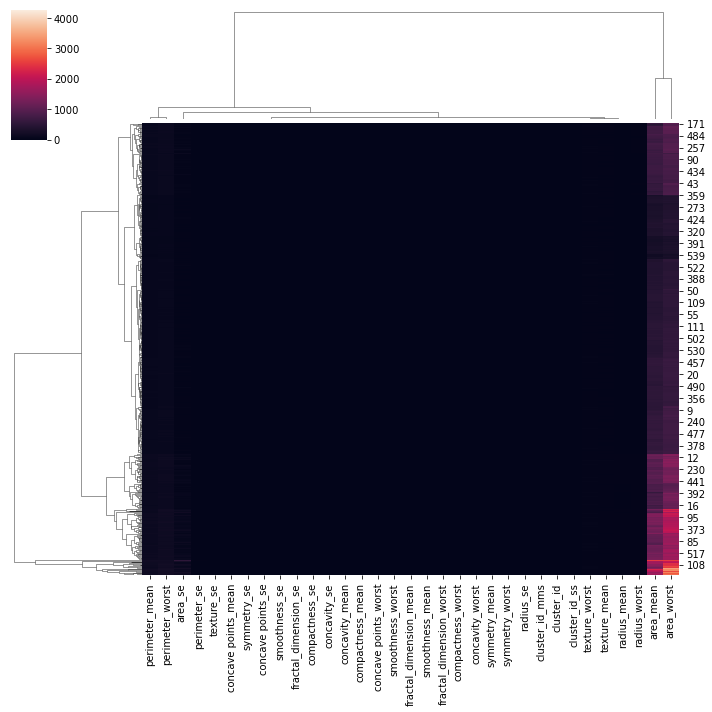

In [26]:
sns.clustermap(data = df_cluster, metric='euclidean', row_cluster=True,
    col_cluster=True,)

<AxesSubplot:xlabel='area_mean', ylabel='area_worst'>

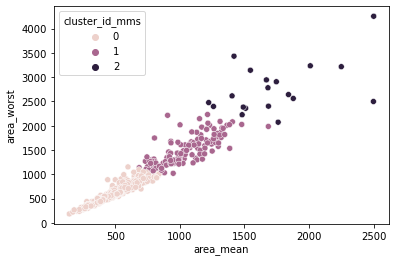

In [27]:
sns.scatterplot(data = df_cluster, x = 'area_mean', y = 'area_worst' , hue = 'cluster_id_mms')

In [28]:
#area_mean and area_worst are the two parameters for 

In [29]:
X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
display(X.head(2))
y = df['area_worst']
display(y.head(2))

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


0    2019.0
1    1956.0
Name: area_worst, dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 20, random_state = 101)

In [31]:
print("X train", X_train.shape)
print("X test", X_test.shape)
print("y train", X_train.shape)
print("y test", X_test.shape)


X train (549, 30)
X test (20, 30)
y train (549, 30)
y test (20, 30)


In [32]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
109,11.340,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.01899,0.1487,0.06529,...,13.01,29.15,83.99,518.1,0.1699,0.21960,0.31200,0.08278,0.2829,0.08832
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.00000,0.00000,0.1742,0.06059,...,10.49,34.24,66.50,330.6,0.1073,0.07158,0.00000,0.00000,0.2475,0.06969
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,0.06043,...,13.76,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301
529,12.070,13.44,77.83,445.2,0.11000,0.09009,0.03781,0.02798,0.1657,0.06608,...,13.45,15.77,86.92,549.9,0.1521,0.16320,0.16220,0.07393,0.2781,0.08052
83,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.2311,0.09203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.01499,0.1539,0.05637,...,13.87,36.00,88.10,594.7,0.1234,0.10640,0.08653,0.06498,0.2407,0.06484
393,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.1502,0.57170,0.70530,0.24220,0.3828,0.10070
75,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,19.77,24.56,128.80,1223.0,0.1500,0.20450,0.28290,0.15200,0.2650,0.06387
337,18.770,21.43,122.90,1092.0,0.09116,0.14020,0.10600,0.06090,0.1953,0.06083,...,24.54,34.37,161.10,1873.0,0.1498,0.48270,0.46340,0.20480,0.3679,0.09870


In [33]:
import statsmodels.api as ab

In [34]:
X_train = ab.add_constant(X_train)
sd = ab.OLS(y_train, X_train)

In [35]:
bn = sd.fit()

In [36]:
print(bn.summary2())

                          Results: Ordinary least squares
Model:                   OLS                   Adj. R-squared:          1.000      
Dependent Variable:      area_worst            AIC:                     -28100.7342
Date:                    2023-01-24 23:37      BIC:                     -27967.1831
No. Observations:        549                   Log-Likelihood:          14081.     
Df Model:                30                    F-statistic:             1.825e+30  
Df Residuals:            518                   Prob (F-statistic):      0.00       
R-squared:               1.000                 Scale:                   3.2676e-24 
-----------------------------------------------------------------------------------
                         Coef.  Std.Err.          t           P>|t|   [0.025 0.975]
-----------------------------------------------------------------------------------
const                    0.0000   0.0000               0.4974 0.6191 -0.0000 0.0000
radius_mean       

In [37]:
bn.pvalues

const                      0.619143
radius_mean                0.737380
texture_mean               0.644623
perimeter_mean             0.970972
area_mean                  0.234956
smoothness_mean            0.816194
compactness_mean           0.662243
concavity_mean             0.801448
concave points_mean        0.905905
symmetry_mean              0.751580
fractal_dimension_mean     0.532544
radius_se                  0.850185
texture_se                 0.548560
perimeter_se               0.638921
area_se                    1.000000
smoothness_se              0.943197
compactness_se             0.903236
concavity_se               0.786306
concave points_se          0.547151
symmetry_se                0.576505
fractal_dimension_se       0.840264
radius_worst               0.526878
texture_worst              0.596975
perimeter_worst            0.656670
area_worst                 0.000000
smoothness_worst           0.772948
compactness_worst          0.702047
concavity_worst            0

In [38]:
bn.params

const                      1.648459e-12
radius_mean                4.547474e-13
texture_mean               2.842171e-14
perimeter_mean             7.105427e-15
area_mean                 -4.884981e-15
smoothness_mean            3.637979e-12
compactness_mean           4.547474e-12
concavity_mean            -2.046363e-12
concave points_mean        1.818989e-12
symmetry_mean             -1.818989e-12
fractal_dimension_mean    -2.728484e-11
radius_se                  4.547474e-13
texture_se                 1.705303e-13
perimeter_se               1.492140e-13
area_se                    0.000000e+00
smoothness_se              3.637979e-12
compactness_se            -2.046363e-12
concavity_se               2.728484e-12
concave points_se         -2.546585e-11
symmetry_se               -1.182343e-11
fractal_dimension_se       1.818989e-11
radius_worst              -2.842171e-13
texture_worst             -2.842171e-14
perimeter_worst           -2.042810e-14
area_worst                 1.000000e+00


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
sd = LinearRegression()

In [41]:
bn = sd.fit(X_train, y_train)

In [42]:
bn.score(X_train, y_train)

1.0

(array([0., 1.]),
 array([ 9.5, 10. , 10.5]),
 <BarContainer object of 2 artists>)

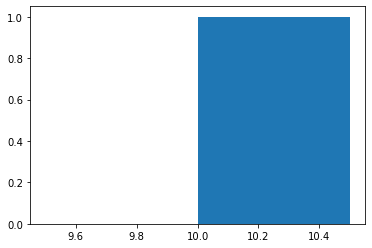

In [43]:
plt.hist(10,2)

<AxesSubplot:xlabel='radius_mean', ylabel='area_worst'>

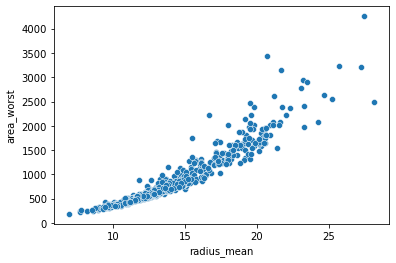

In [46]:
sns.scatterplot(data = df , x ='radius_mean', y = 'area_worst')